In [ ]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# importing the dataset
data = pd.read_csv('/synthetic_customer_churn_data_full.csv')

In [ ]:
#reading through the dataset and viewing it
numerical_columns = ['Age', 'MonthlyCharges', 'TotalCharges', 'Tenure', 'AverageMonthlyCharges', 'CustomerLifetimeValue']
numerical_summary = data[numerical_columns].describe()
print("Summary Statistics for Numerical Columns:\n", numerical_summary)

Summary Statistics for Numerical Columns:
                Age  MonthlyCharges  TotalCharges       Tenure  \
count  3959.000000     4000.000000   3976.000000  4000.000000   
mean     50.133872       69.855615   2527.737413    36.200500   
std      17.523845       28.641075   1906.473451    20.811333   
min      20.000000       20.011864     24.827189     1.000000   
25%      35.000000       45.388002   1015.927853    18.000000   
50%      50.000000       69.564474   2105.827181    36.000000   
75%      65.000000       94.278019   3669.611117    54.000000   
max      80.000000      119.989267  19165.805858    72.000000   

       AverageMonthlyCharges  CustomerLifetimeValue  
count            3976.000000            3976.000000  
mean               70.239773            2527.736710  
std                29.989606            1906.473289  
min                20.011861              24.826940  
25%                45.456203            1015.926964  
50%                69.669104            2105.82

In [ ]:
# statistical analysis of the dataset
categorical_columns = ['Gender', 'ContractType', 'TechSupport', 'InternetService', 'PaperlessBilling', 'PaymentMethod', 'Churn']
categorical_summary = data[categorical_columns].describe()
print("\nSummary Statistics for Categorical Columns:\n", categorical_summary)


Summary Statistics for Categorical Columns:
         Gender    ContractType TechSupport InternetService PaperlessBilling  \
count     4000            4000        4000            4000             4000   
unique       2               3           2               3                2   
top     Female  Month-to-month          No             DSL              Yes   
freq      2005            1959        2862            1637             2394   

           PaymentMethod Churn  
count               4000  4000  
unique                 4     2  
top     Electronic check    No  
freq                1601  3181  


<ipython-input-43-2fe2c9be0e4a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
<ipython-input-43-2fe2c9be0e4a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
<ipython-input-43-2fe2c9be0e4a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=col, palette='Set2')
<ipython-input-43-2fe2c9be0e4a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` 

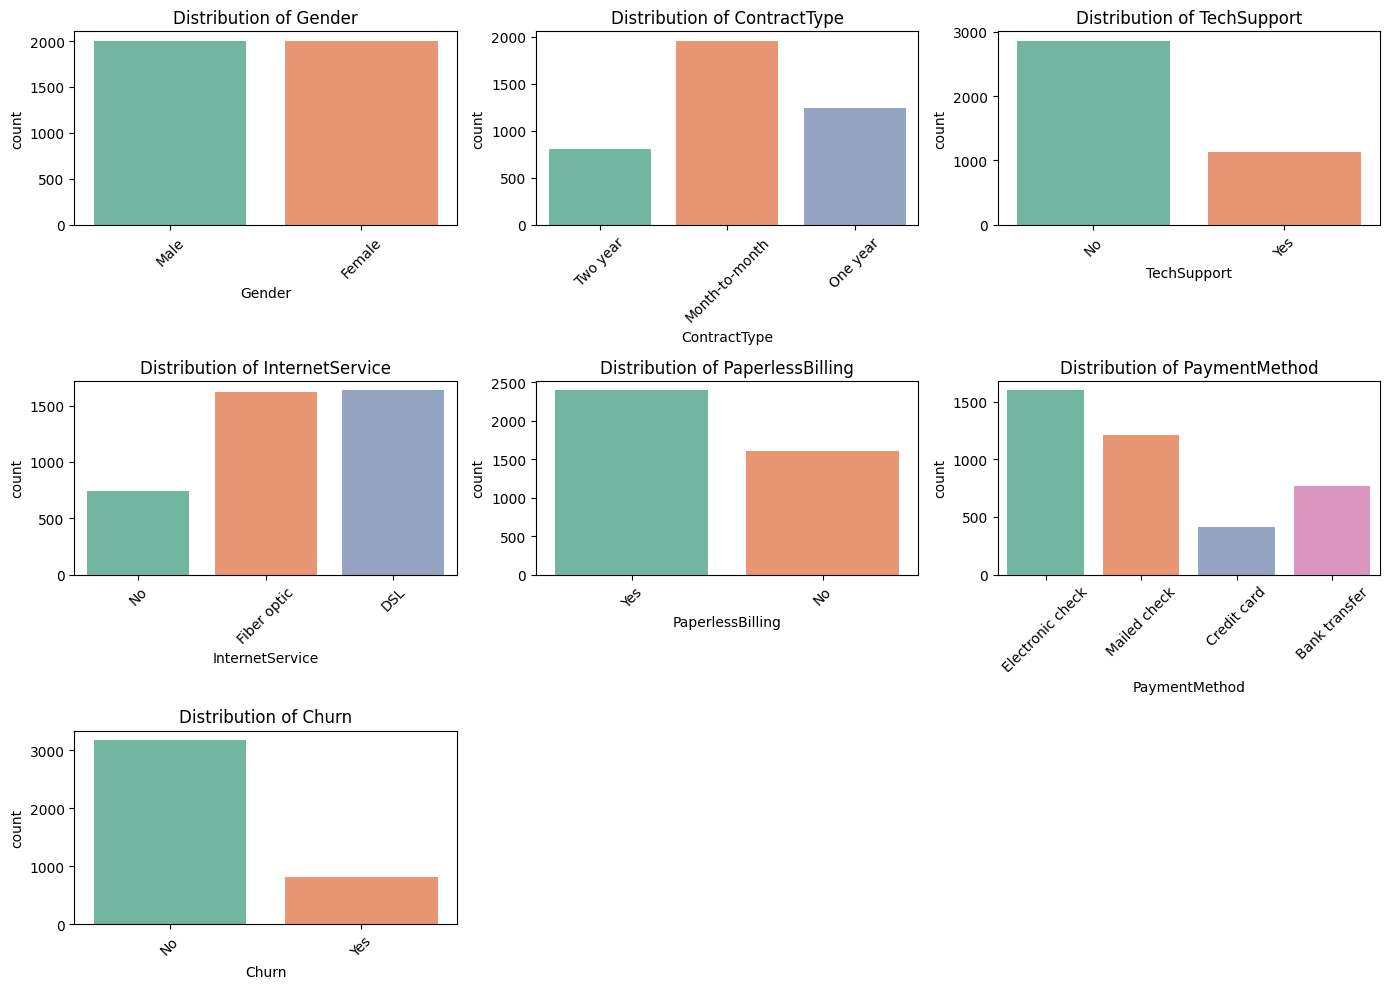

In [ ]:
#viewing the statistical analysis
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=data, x=col, palette='Set2')
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

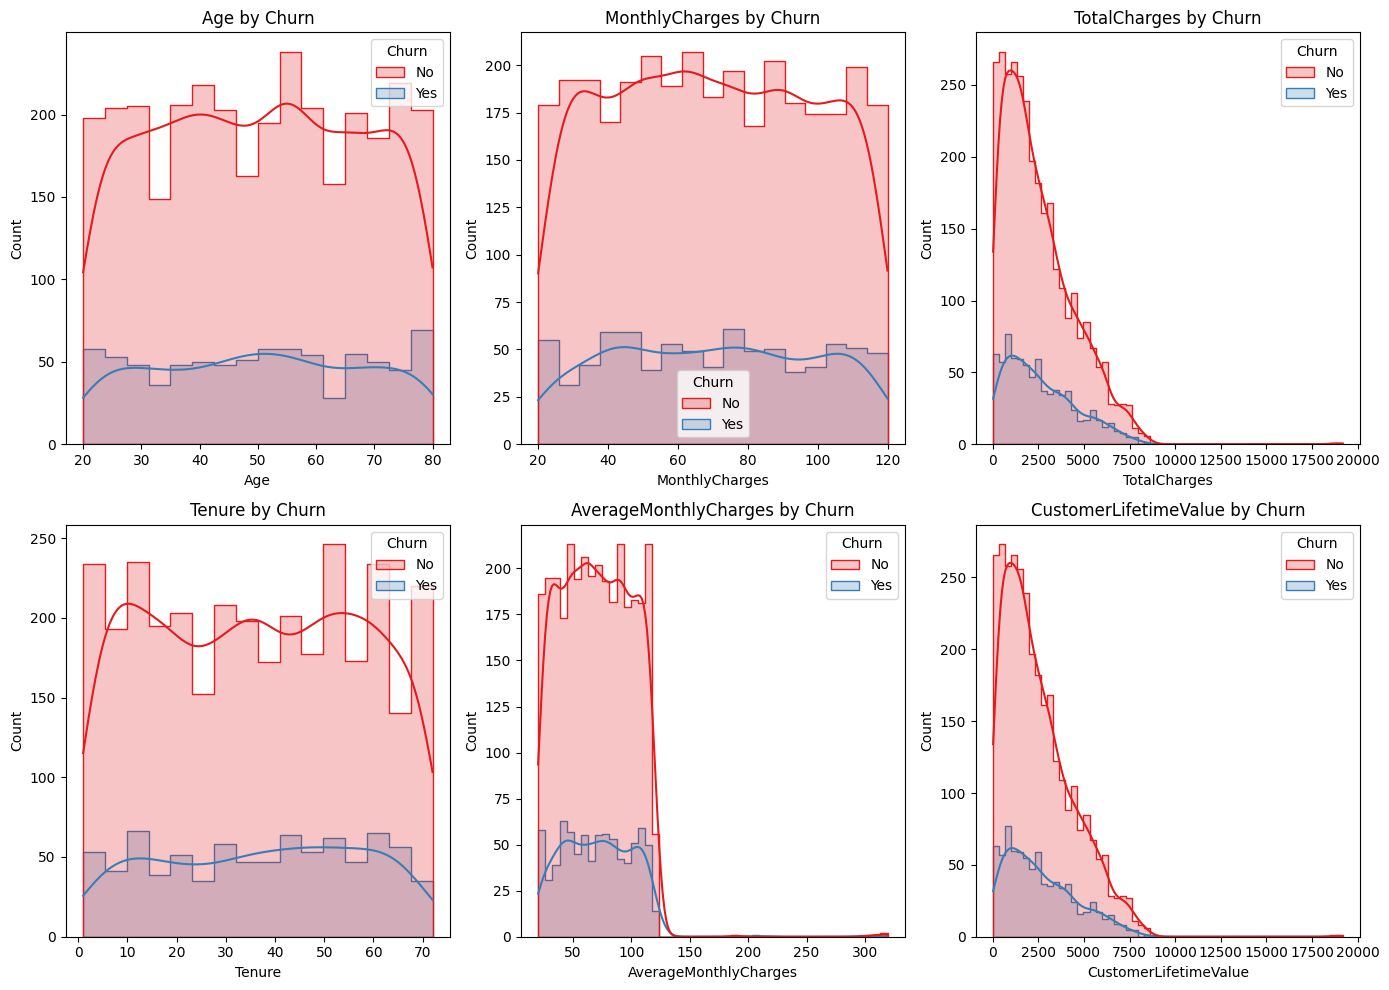

In [ ]:
# Plotting the graphical results
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=col, hue='Churn', element='step', kde=True, palette='Set1')
    plt.title(f"{col} by Churn")
plt.tight_layout()
plt.show()

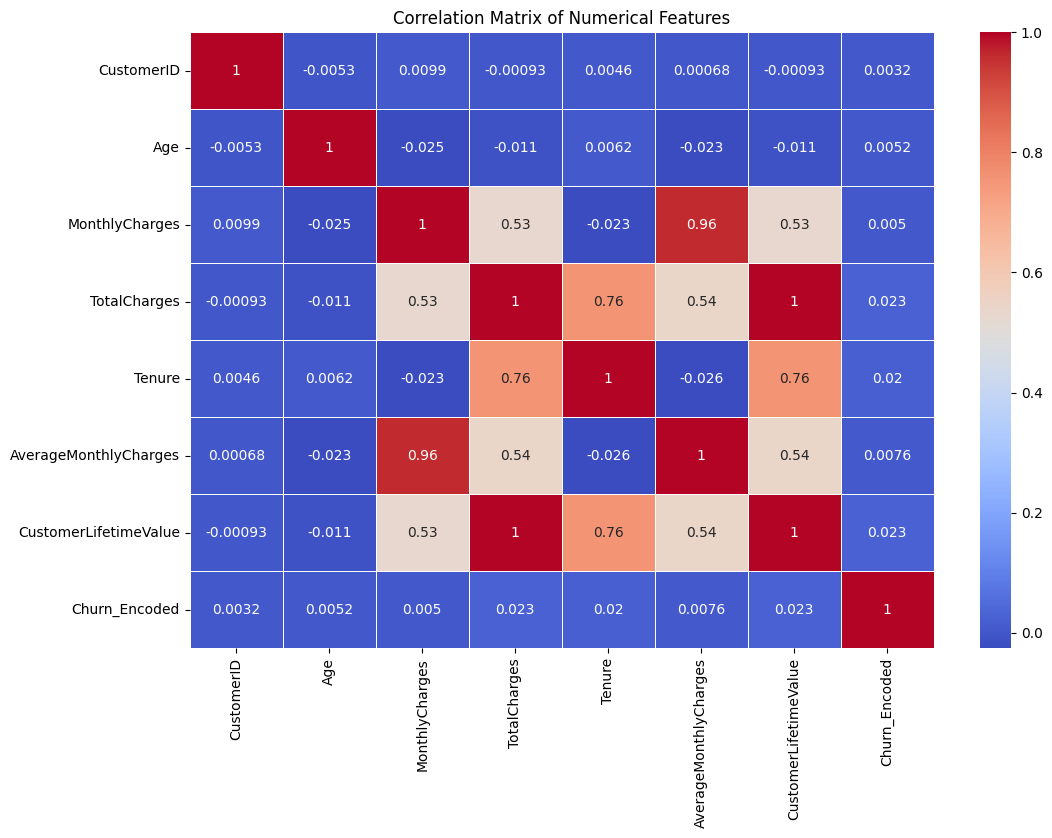

In [ ]:
data['Churn_Encoded'] = LabelEncoder().fit_transform(data['Churn'])

# Correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Visualizing the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [ ]:
# Required Libraries for Data Preparation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
import pandas as pd # Import pandas

# Step 1: Handle Missing Values
# Checking for missing values
print("Missing Values in the Dataset:\n", data.isnull().sum())

# Using SimpleImputer to handle missing values for numerical and categorical columns
numerical_imputer = SimpleImputer(strategy='mean')  # Replace missing values with mean for numerical features
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Replace missing values with mode for categorical features

# Impute missing values in numerical columns
data[numerical_columns] = numerical_imputer.fit_transform(data[numerical_columns])

# Impute missing values in categorical columns
# Remove the columns that will be one-hot encoded from the list of categorical columns
categorical_columns_to_impute = [col for col in categorical_columns if col not in multiclass_columns]
data[categorical_columns_to_impute] = categorical_imputer.fit_transform(data[categorical_columns_to_impute])

# Step 2: Encode Categorical Features into Numerical Format
# Label Encoding for Binary Columns
binary_columns = ['Gender', 'PaperlessBilling', 'Churn']
label_encoders = {}
for col in binary_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Check if multiclass columns still exist before one-hot encoding
if all(col in data.columns for col in multiclass_columns):
    # One-Hot Encoding for Multiclass Categorical Columns
    multiclass_columns = ['ContractType', 'TechSupport', 'InternetService', 'PaymentMethod']
    data = pd.get_dummies(data, columns=multiclass_columns, drop_first=True)
else:
    print("Multiclass columns have already been one-hot encoded.")



# Step 3: Split the Dataset into Training, Validation, and Testing Sets
# Define features (X) and target (y)
X = data.drop(columns=['Churn'])
y = data['Churn']

# Splitting the data into training (70%), validation (15%), and testing (15%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f"Training set size: {X_train.shape}, Validation set size: {X_val.shape}, Test set size: {X_test.shape}")

# Step 4: Handle Imbalanced Data
# Check the distribution of the target variable in the training set
print("Target Variable Distribution in Training Set:\n", y_train.value_counts(normalize=True))

# If the dataset is imbalanced, apply resampling techniques
if y_train.value_counts()[0] / y_train.value_counts()[1] > 1.5:  # Adjust threshold as needed
    # Upsample minority class
    X_train_minority = X_train[y_train == 1]
    y_train_minority = y_train[y_train == 1]

    X_train_majority = X_train[y_train == 0]
    y_train_majority = y_train[y_train == 0]

    X_train_minority_upsampled, y_train_minority_upsampled = resample(X_train_minority,
                                                                     y_train_minority,
                                                                     replace=True,
                                                                     n_samples=len(X_train_majority),
                                                                     random_state=42)

Missing Values in the Dataset:
 CustomerID                0
Age                      41
Gender                    0
ContractType              0
MonthlyCharges            0
TotalCharges             24
TechSupport               0
InternetService           0
Tenure                    0
PaperlessBilling          0
PaymentMethod             0
Churn                     0
AverageMonthlyCharges    24
CustomerLifetimeValue    24
Churn_Encoded             0
dtype: int64
Training set size: (2800, 18), Validation set size: (600, 18), Test set size: (600, 18)
Target Variable Distribution in Training Set:
 Churn
0    0.795357
1    0.204643
Name: proportion, dtype: float64


New Features Created:
    CustomerID   Age  Gender  MonthlyCharges  TotalCharges  Tenure  \
0        1502  24.0       1       34.508945    517.634170    15.0   
1        2587  54.0       0       72.506387   1305.114966    18.0   
2        2654  76.0       0       58.955314   3183.586932    54.0   
3        1056  57.0       0       73.545831   2647.649912    36.0   
4         706  23.0       1       76.694586   4218.202216    55.0   

   PaperlessBilling  Churn  AverageMonthlyCharges  CustomerLifetimeValue  ...  \
0                 1      0              34.508922             517.633825  ...   
1                 0      1              72.506347            1305.114241  ...   
2                 1      0              58.955303            3183.586343  ...   
3                 0      1              73.545810            2647.649177  ...   
4                 1      1              76.694572            4218.201449  ...   

   PaymentMethod_Mailed check  ContractMonths  TenurePerContractType  \
0  

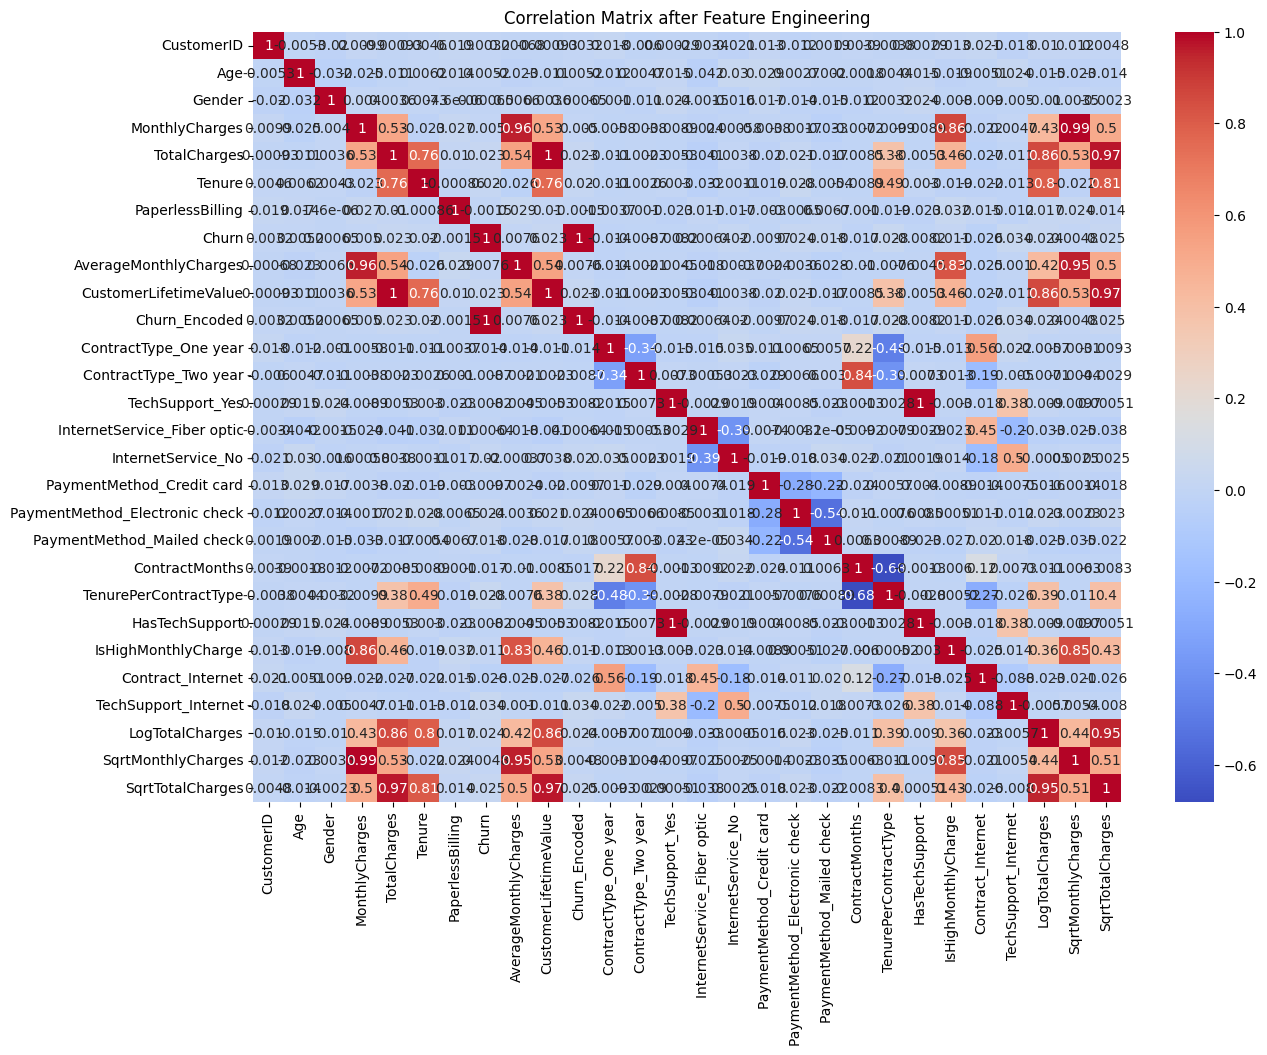

In [ ]:
# Feature Engineering: Creating Additional Features

# Since 'ContractType' is one-hot encoded, we calculate 'ContractMonths' directly:
data['ContractMonths'] = data['ContractType_One year'] * 12 + data['ContractType_Two year'] * 24 + (1 - data['ContractType_One year'] - data['ContractType_Two year']) * 1
data['TenurePerContractType'] = data['Tenure'] / data['ContractMonths']

# 2. Create a binary indicator for customers who have tech support
data['HasTechSupport'] = np.where(data['TechSupport_Yes'] == 1, 1, 0)

# 3. Create an indicator for high monthly charges
data['IsHighMonthlyCharge'] = np.where(data['MonthlyCharges'] > data['MonthlyCharges'].mean(), 1, 0)

# 4. Combine contract type and internet service to capture potential interactions
data['Contract_Internet'] = data['ContractType_One year'] * data['InternetService_Fiber optic']
# Use the correct one-hot encoded column name for InternetService_DSL
data['TechSupport_Internet'] = data['TechSupport_Yes'] * data['InternetService_No']

# 5. Log Transformation to handle skewness in TotalCharges
data['LogTotalCharges'] = np.log1p(data['TotalCharges'])

# Feature Interactions and Transformations
# Apply square root transformation to some columns (if needed)
data['SqrtMonthlyCharges'] = np.sqrt(data['MonthlyCharges'])
data['SqrtTotalCharges'] = np.sqrt(data['TotalCharges'])

# Display the new feature set
print("New Features Created:\n", data.head())

# Ensure that all categorical features are encoded
# data = pd.get_dummies(data, drop_first=True) # No need to apply one-hot encoding again

# Check correlations of new features with target variable
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix after Feature Engineering")
plt.show()


Optimizing Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best Params for Logistic Regression: {'C': 10}

Optimizing Decision Tree...
Best Params for Decision Tree: {'max_depth': 3, 'min_samples_split': 2}

Evaluating Logistic Regression on Validation Set...
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
ROC AUC: 1.00

Evaluating Decision Tree on Validation Set...
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
ROC AUC: 1.00

Training Bagging Classifier with Decision Trees...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Classifier Accuracy: 1.00
Bagging Classifier ROC AUC: 1.00


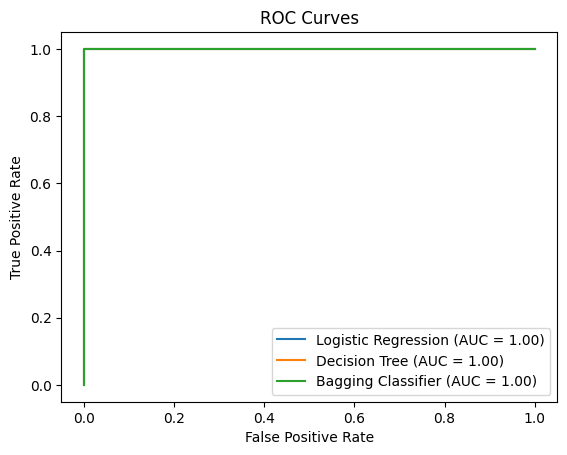

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Split dataset into training, validation, and test sets
X = data.drop('Churn', axis=1)  # Drop the original 'Churn' column
y = data['Churn']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the models and hyperparameter grid
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5)  # Limit max depth to control complexity
}

# Define hyperparameter search space for Grid Search
param_grids = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10]},  # Regularization parameter
    'Decision Tree': {'max_depth': [3, 5, 7], 'min_samples_split': [2, 10, 20]}  # Restrict tree depth and min samples
}

# Perform Grid Search and Evaluate Models
best_models = {}
for name, model in models.items():
    print(f"\nOptimizing {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best Params for {name}: {grid_search.best_params_}")

# Evaluate the optimized models on the validation set
for name, model in best_models.items():
    print(f"\nEvaluating {name} on Validation Set...")
    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val)[:, 1]
    print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.2f}")
    print(f"Precision: {precision_score(y_val, y_val_pred):.2f}")
    print(f"Recall: {recall_score(y_val, y_val_pred):.2f}")
    print(f"F1-Score: {f1_score(y_val, y_val_pred):.2f}")
    print(f"ROC AUC: {roc_auc_score(y_val, y_val_prob):.2f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_val_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_val, y_val_prob):.2f})')

# Consider Ensemble Methods: Bagging with Decision Trees
print("\nTraining Bagging Classifier with Decision Trees...")
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5), n_estimators=50, random_state=42)
bagging_clf.fit(X_train, y_train)
y_val_bagging_pred = bagging_clf.predict(X_val)
y_val_bagging_prob = bagging_clf.predict_proba(X_val)[:, 1]

print(f"Bagging Classifier Accuracy: {accuracy_score(y_val, y_val_bagging_pred):.2f}")
print(f"Bagging Classifier ROC AUC: {roc_auc_score(y_val, y_val_bagging_prob):.2f}")


# Plot ROC Curve for Bagging Classifier
fpr, tpr, _ = roc_curve(y_val, y_val_bagging_prob)
plt.plot(fpr, tpr, label=f'Bagging Classifier (AUC = {roc_auc_score(y_val, y_val_bagging_prob):.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Use Stratified K-Fold Cross-Validation for evaluating models
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in best_models.items():
    print(f"\nCross-Validation Scores for {name}...")
    cv_scores = cross_val_score(model, X, y, cv=skf, scoring='roc_auc')
    print(f"Mean ROC AUC: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# Re-tune Decision Tree with more restrictions
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              param_grid={'max_depth': [2, 3, 4], 'min_samples_split': [10, 20, 30]},
                              cv=5, scoring='roc_auc')
grid_search_dt.fit(X_train, y_train)
print(f"Re-tuned Decision Tree Best Params: {grid_search_dt.best_params_}")

# Evaluate on test set
for name, model in best_models.items():
    print(f"\nEvaluating {name} on Test Set...")
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]
    print(f"Test Set Accuracy: {accuracy_score(y_test, y_test_pred):.2f}")
    print(f"Test Set ROC AUC: {roc_auc_score(y_test, y_test_prob):.2f}")



Cross-Validation Scores for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Mean ROC AUC: 1.00 ± 0.00

Cross-Validation Scores for Decision Tree...
Mean ROC AUC: 1.00 ± 0.00
Re-tuned Decision Tree Best Params: {'max_depth': 2, 'min_samples_split': 10}

Evaluating Logistic Regression on Test Set...
Test Set Accuracy: 1.00
Test Set ROC AUC: 1.00

Evaluating Decision Tree on Test Set...
Test Set Accuracy: 1.00
Test Set ROC AUC: 1.00
